In [1]:
!pip install shap

In [8]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    ConfusionMatrixDisplay
)
import shap
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
# Load the balanced binary dataset
df = pd.read_csv('/content/diabetes_binary_5050split_health_indicators_BRFSS2015.csv')
# Preview data
print("Shape:", df.shape)
display(df.head())

Shape: (70692, 22)


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


0 missing values


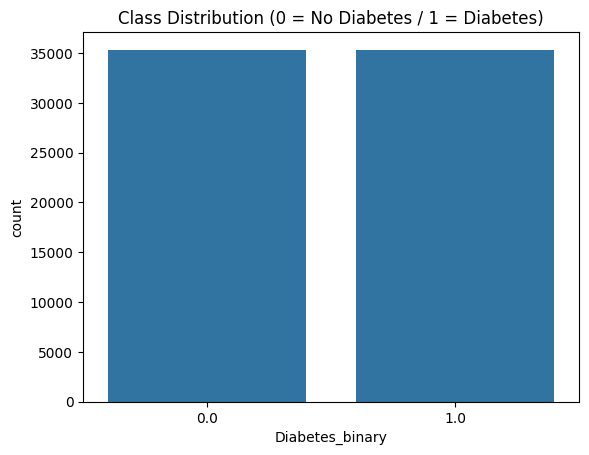

In [10]:
#Explore the dataset
print(df.isna().sum().sum(), "missing values")

# Summary stats
df.describe().T.head(10)

# Check class balance
sns.countplot(x='Diabetes_binary', data=df)
plt.title("Class Distribution (0 = No Diabetes / 1 = Diabetes)")
plt.show()

In [11]:
# Split features and target
X = df.drop('Diabetes_binary', axis=1)
y = df['Diabetes_binary']

In [12]:
print(df.columns)

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')


In [13]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print("Train:", X_train.shape, " Test:", X_test.shape)

Train: (56553, 21)  Test: (14139, 21)


Logistic Regression (Balanced Dataset)

Logistic Regression Performance on BALANCED Test Set
-------------------------------------------------------
Accuracy : 0.7458094631869298
Precision: 0.7371366179882626
Recall   : 0.7640401754137784
F1 Score : 0.7503473186996388
AUROC    : 0.82322481788425


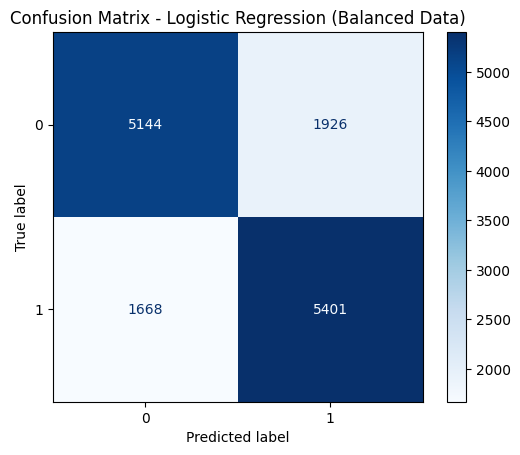


 Random Forest (Balanced Dataset)

Random Forest Performance on BALANCED Test Set
-------------------------------------------------------
Accuracy : 0.7335738029563619
Precision: 0.7185018528321864
Recall   : 0.7680011317017966
F1 Score : 0.7424273504273504
AUROC    : 0.8097282935253491


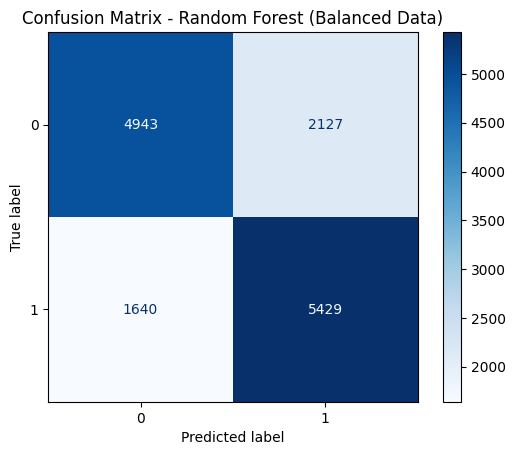


 XGBoost (Balanced Dataset)

XGBoost Performance on BALANCED Test Set
-------------------------------------------------------
Accuracy : 0.7482848857769291
Precision: 0.72911227154047
Recall   : 0.7900693167350403
F1 Score : 0.7583678457464865
AUROC    : 0.8247269839446812


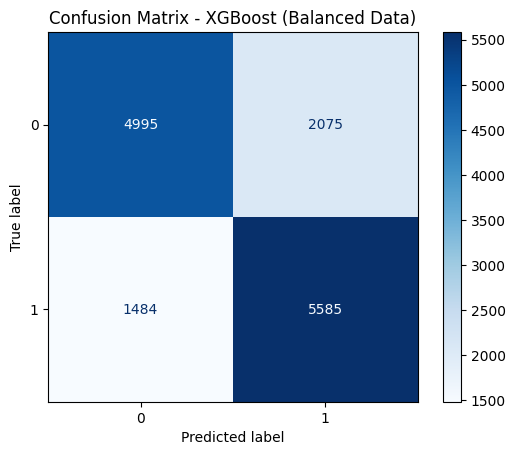

In [15]:


#Train Models

#Helper Function

def print_metrics(y_true, y_pred, y_prob, model_name="Model"):
    """Print standard classification metrics."""
    print(f"\n{model_name} Performance on BALANCED Test Set")
    print("-" * 55)
    print("Accuracy :", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall   :", recall_score(y_true, y_pred))
    print("F1 Score :", f1_score(y_true, y_pred))
    print("AUROC    :", roc_auc_score(y_true, y_prob))

def plot_confusion(y_true, y_pred, title):
    """Plot confusion matrix."""
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap="Blues")
    plt.title(title)
    plt.show()


# Logistic Regression
print("Logistic Regression (Balanced Dataset)")

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

y_pred_logreg = logreg.predict(X_test)
y_prob_logreg = logreg.predict_proba(X_test)[:, 1]

print_metrics(y_test, y_pred_logreg, y_prob_logreg, "Logistic Regression")
plot_confusion(y_test, y_pred_logreg,
               "Confusion Matrix - Logistic Regression (Balanced Data)")


# Random Forest
print("\n Random Forest (Balanced Dataset)")

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]

print_metrics(y_test, y_pred_rf, y_prob_rf, "Random Forest")
plot_confusion(y_test, y_pred_rf,
               "Confusion Matrix - Random Forest (Balanced Data)")


# XGBoost

print("\n XGBoost (Balanced Dataset)")

xgb = XGBClassifier(eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)
y_prob_xgb = xgb.predict_proba(X_test)[:, 1]

print_metrics(y_test, y_pred_xgb, y_prob_xgb, "XGBoost")
plot_confusion(y_test, y_pred_xgb,
               "Confusion Matrix - XGBoost (Balanced Data)")

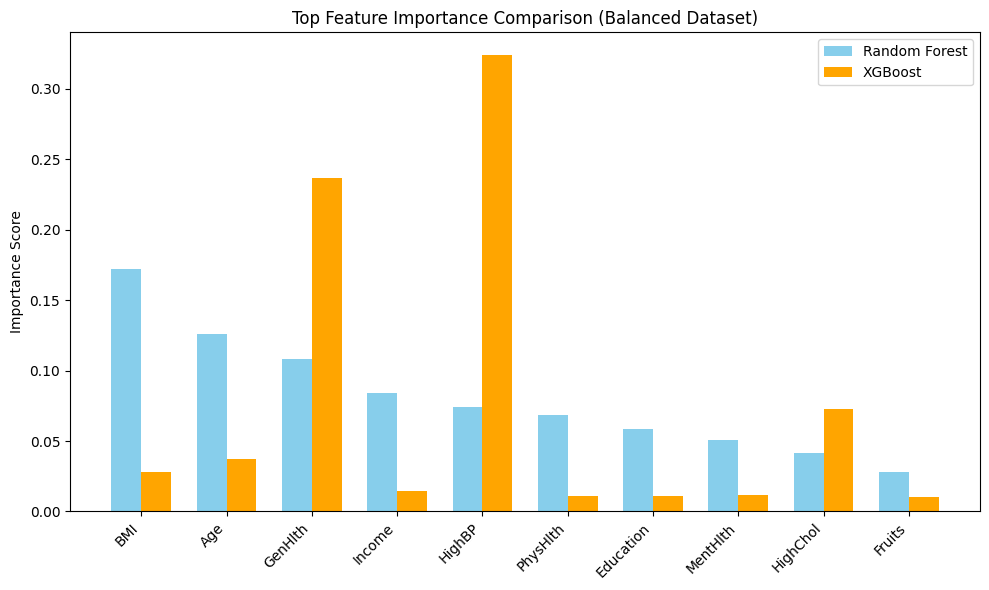

In [33]:
# Define feature names and importances
feature_names = X.columns
rf_importances = rf.feature_importances_
xgb_importances = xgb.feature_importances_

# Combine top features
combined_df = pd.DataFrame({
    "Feature": feature_names,
    "RF": rf_importances,
    "XGB": xgb_importances
}).sort_values(by="RF", ascending=False).head(10)

# Plot
x = np.arange(len(combined_df))
width = 0.35

plt.figure(figsize=(10, 6))
plt.bar(x - width/2, combined_df["RF"], width, label="Random Forest", color="skyblue")
plt.bar(x + width/2, combined_df["XGB"], width, label="XGBoost", color="orange")

plt.xticks(x, combined_df["Feature"], rotation=45, ha='right')
plt.ylabel("Importance Score")
plt.title("Top Feature Importance Comparison (Balanced Dataset)")
plt.legend()
plt.tight_layout()
plt.show()

In [16]:
# Load imbalanced dataset
df_imb = pd.read_csv("/content/diabetes_binary_health_indicators_BRFSS2015.csv")

X = df_imb.drop(columns=["Diabetes_binary"])
y = df_imb["Diabetes_binary"].astype(int)

# Preview data
print("Shape:", df.shape)
display(df.head())

Shape: (70692, 22)


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


0 missing values
Class Distribution:
 Diabetes_binary
0.0    218334
1.0     35346
Name: count, dtype: int64

Percentage:
 Diabetes_binary
0.0    86.066698
1.0    13.933302
Name: proportion, dtype: float64


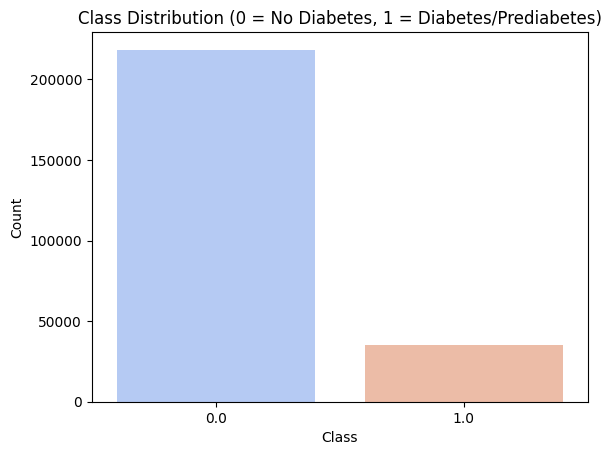

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

print(df_imb.isna().sum().sum(), "missing values")

target_col = 'Diabetes_binary'
class_counts = df_imb[target_col].value_counts()
class_percent = df_imb[target_col].value_counts(normalize=True) * 100

print("Class Distribution:\n", class_counts)
print("\nPercentage:\n", class_percent)

# Plot class distribution
sns.barplot(x=class_counts.index, y=class_counts.values, palette='coolwarm', hue=class_counts.index, legend=False)
plt.title("Class Distribution (0 = No Diabetes, 1 = Diabetes/Prediabetes)")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()
plt.show()

In [21]:
# Train-Test Split for Imbalanced Data


# Separate features and target
X_imb = df_imb.drop("Diabetes_binary", axis=1)
y_imb = df_imb["Diabetes_binary"]

# Perform train-test split (keep real imbalance)
X_train_imb, X_test_imb, y_train_imb, y_test_imb = train_test_split(
    X_imb,
    y_imb,
    test_size=0.2,
    random_state=42,
    stratify=y_imb   # Keeps the original imbalance ratio in both sets
)

print("Training set shape:", X_train_imb.shape, y_train_imb.shape)
print("Test set shape:", X_test_imb.shape, y_test_imb.shape)

print("\nClass distribution in training set:")
print(y_train_imb.value_counts())

print("\nClass distribution in test set:")
print(y_test_imb.value_counts())


Training set shape: (202944, 21) (202944,)
Test set shape: (50736, 21) (50736,)

Class distribution in training set:
Diabetes_binary
0.0    174667
1.0     28277
Name: count, dtype: int64

Class distribution in test set:
Diabetes_binary
0.0    43667
1.0     7069
Name: count, dtype: int64


Logistic Regression (Imbalanced Dataset - Baseline)

Logistic Regression (Imbalanced Baseline) Performance on IMBALANCED Test Set
------------------------------------------------------------
Accuracy : 0.8622082939135919
Precision: 0.5180555555555556
Recall   : 0.15829678879615222
F1 Score : 0.2424964784917109
AUROC    : 0.8191785143250795


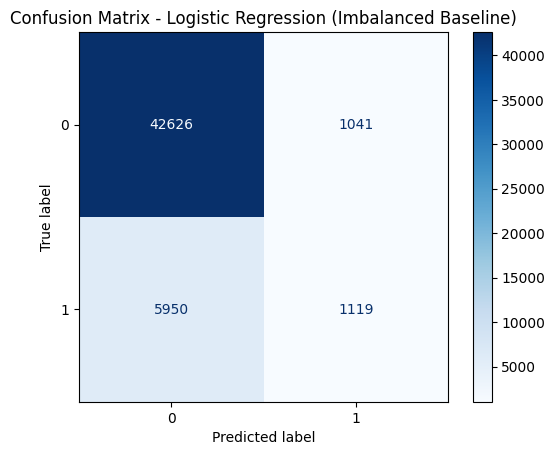


 Random Forest (Imbalanced Dataset - Baseline)

Random Forest (Imbalanced Baseline) Performance on IMBALANCED Test Set
------------------------------------------------------------
Accuracy : 0.8594094922737306
Precision: 0.4876256767208043
Recall   : 0.1783844956853869
F1 Score : 0.26121180735370275
AUROC    : 0.7943530274842081


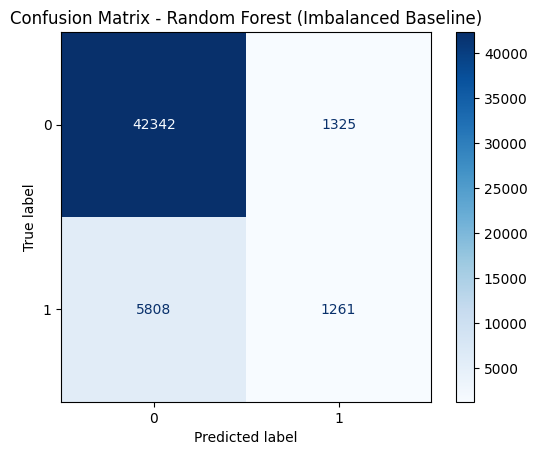


 XGBoost (Imbalanced Dataset - Baseline)

XGBoost (Imbalanced Baseline) Performance on IMBALANCED Test Set
------------------------------------------------------------
Accuracy : 0.8633711762850835
Precision: 0.5308976093820478
Recall   : 0.16650162682133257
F1 Score : 0.25349989231100584
AUROC    : 0.8237115900980083


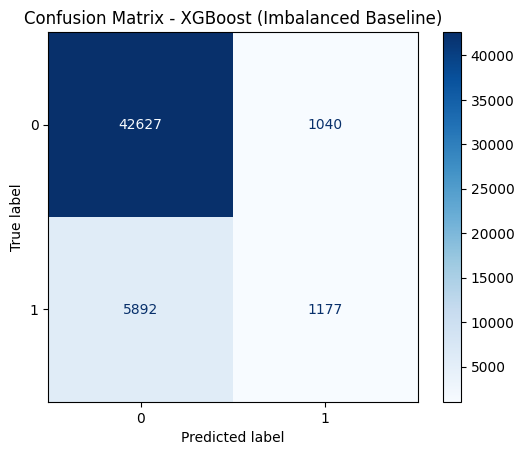

In [23]:

# Baseline Models on IMBALANCED Dataset

def print_metrics(y_true, y_pred, y_prob, model_name="Model"):
    """Print standard classification metrics."""
    print(f"\n{model_name} Performance on IMBALANCED Test Set")
    print("-" * 60)
    print("Accuracy :", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall   :", recall_score(y_true, y_pred))
    print("F1 Score :", f1_score(y_true, y_pred))
    print("AUROC    :", roc_auc_score(y_true, y_prob))

def plot_confusion(y_true, y_pred, title):
    """Plot confusion matrix."""
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap="Blues")
    plt.title(title)
    plt.show()


# Logistic Regression (Baseline)


print("Logistic Regression (Imbalanced Dataset - Baseline)")

logreg_imb = LogisticRegression(max_iter=1000)
logreg_imb.fit(X_train_imb, y_train_imb)

y_pred_logreg_imb = logreg_imb.predict(X_test_imb)
y_prob_logreg_imb = logreg_imb.predict_proba(X_test_imb)[:, 1]

print_metrics(y_test_imb, y_pred_logreg_imb, y_prob_logreg_imb,
              "Logistic Regression (Imbalanced Baseline)")
plot_confusion(y_test_imb, y_pred_logreg_imb,
               "Confusion Matrix - Logistic Regression (Imbalanced Baseline)")


# Random Forest (Baseline)


print("\n Random Forest (Imbalanced Dataset - Baseline)")

rf_imb = RandomForestClassifier(n_estimators=100, random_state=42)
rf_imb.fit(X_train_imb, y_train_imb)

y_pred_rf_imb = rf_imb.predict(X_test_imb)
y_prob_rf_imb = rf_imb.predict_proba(X_test_imb)[:, 1]

print_metrics(y_test_imb, y_pred_rf_imb, y_prob_rf_imb,
              "Random Forest (Imbalanced Baseline)")
plot_confusion(y_test_imb, y_pred_rf_imb,
               "Confusion Matrix - Random Forest (Imbalanced Baseline)")

# XGBoost (Baseline)


print("\n XGBoost (Imbalanced Dataset - Baseline)")

xgb_imb = XGBClassifier(eval_metric='logloss', random_state=42)
xgb_imb.fit(X_train_imb, y_train_imb)

y_pred_xgb_imb = xgb_imb.predict(X_test_imb)
y_prob_xgb_imb = xgb_imb.predict_proba(X_test_imb)[:, 1]

print_metrics(y_test_imb, y_pred_xgb_imb, y_prob_xgb_imb,
              "XGBoost (Imbalanced Baseline)")
plot_confusion(y_test_imb, y_pred_xgb_imb,
               "Confusion Matrix - XGBoost (Imbalanced Baseline)")



 Logistic Regression (SMOTE-Resampled)
              precision    recall  f1-score   support

           0       0.95      0.73      0.82     43667
           1       0.31      0.76      0.44      7069

    accuracy                           0.73     50736
   macro avg       0.63      0.74      0.63     50736
weighted avg       0.86      0.73      0.77     50736

ROC-AUC: 0.8177166410497446


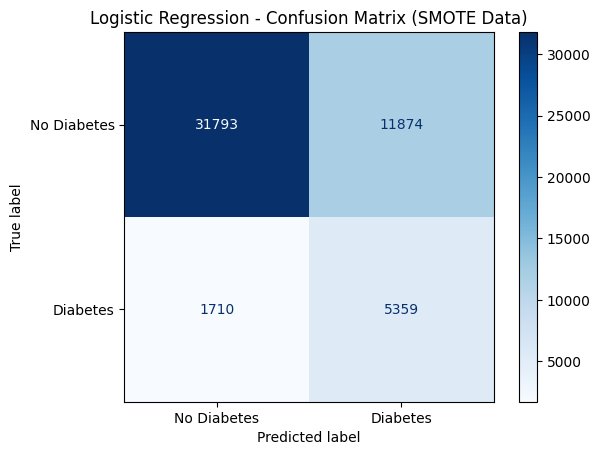


 Random Forest (SMOTE-Resampled)
              precision    recall  f1-score   support

           0       0.88      0.96      0.92     43667
           1       0.46      0.20      0.28      7069

    accuracy                           0.86     50736
   macro avg       0.67      0.58      0.60     50736
weighted avg       0.82      0.86      0.83     50736

ROC-AUC: 0.7953025547587526


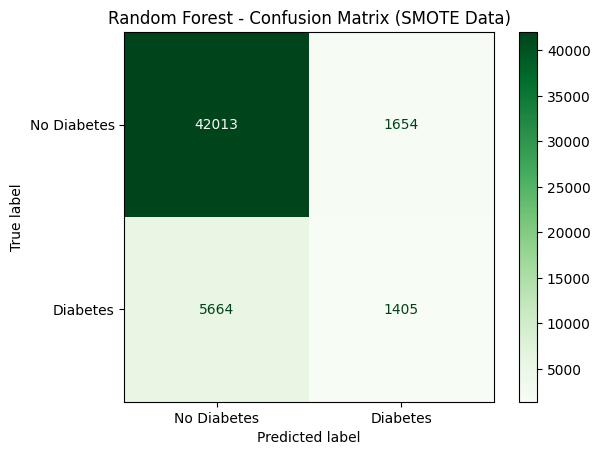


 XGBoost (SMOTE-Resampled)
              precision    recall  f1-score   support

           0       0.88      0.97      0.92     43667
           1       0.53      0.20      0.30      7069

    accuracy                           0.86     50736
   macro avg       0.71      0.59      0.61     50736
weighted avg       0.83      0.86      0.84     50736

ROC-AUC: 0.8238449133787101


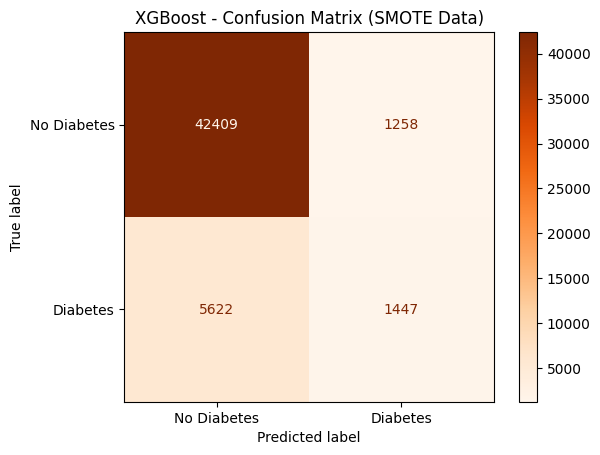

In [29]:
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

# Logistic Regression with SMOTE-resampled data
print("\n Logistic Regression (SMOTE-Resampled)")
lr_smote = LogisticRegression(max_iter=2000, random_state=42, solver='liblinear')
lr_smote.fit(X_res, y_res)
lr_smote_pred = lr_smote.predict(X_test)
lr_smote_prob = lr_smote.predict_proba(X_test)[:,1]

print(classification_report(y_test, lr_smote_pred))
print("ROC-AUC:", roc_auc_score(y_test, lr_smote_prob))

cm_lr_smote = confusion_matrix(y_test, lr_smote_pred)
disp_lr_smote = ConfusionMatrixDisplay(confusion_matrix=cm_lr_smote, display_labels=["No Diabetes", "Diabetes"])
disp_lr_smote.plot(cmap="Blues")
plt.title("Logistic Regression - Confusion Matrix (SMOTE Data)")
plt.show()

# Random Forest Classifier with SMOTE-resampled data
print("\n Random Forest (SMOTE-Resampled)")
rf_smote = RandomForestClassifier(n_estimators=400, random_state=42)
rf_smote.fit(X_res, y_res)
rf_smote_pred = rf_smote.predict(X_test)
rf_smote_prob = rf_smote.predict_proba(X_test)[:,1]

print(classification_report(y_test, rf_smote_pred))
print("ROC-AUC:", roc_auc_score(y_test, rf_smote_prob))

cm_rf_smote = confusion_matrix(y_test, rf_smote_pred)
disp_rf_smote = ConfusionMatrixDisplay(confusion_matrix=cm_rf_smote, display_labels=["No Diabetes", "Diabetes"])
disp_rf_smote.plot(cmap="Greens")
plt.title("Random Forest - Confusion Matrix (SMOTE Data)")
plt.show()

# 3. XGBoost Classifier with SMOTE-resampled data (without scale_pos_weight)
print("\n XGBoost (SMOTE-Resampled)")
xgb_smote = XGBClassifier(
    objective="binary:logistic", eval_metric="auc",
    learning_rate=0.05, n_estimators=400, max_depth=5,
    subsample=0.8, colsample_bytree=0.8, random_state=42
)
xgb_smote.fit(X_res, y_res)
xgb_smote_pred = xgb_smote.predict(X_test)
xgb_smote_prob = xgb_smote.predict_proba(X_test)[:,1]

print(classification_report(y_test, xgb_smote_pred))
print("ROC-AUC:", roc_auc_score(y_test, xgb_smote_prob))

cm_xgb_smote = confusion_matrix(y_test, xgb_smote_pred)
disp_xgb_smote = ConfusionMatrixDisplay(confusion_matrix=cm_xgb_smote, display_labels=["No Diabetes", "Diabetes"])
disp_xgb_smote.plot(cmap="Oranges")
plt.title("XGBoost - Confusion Matrix (SMOTE Data)")
plt.show()


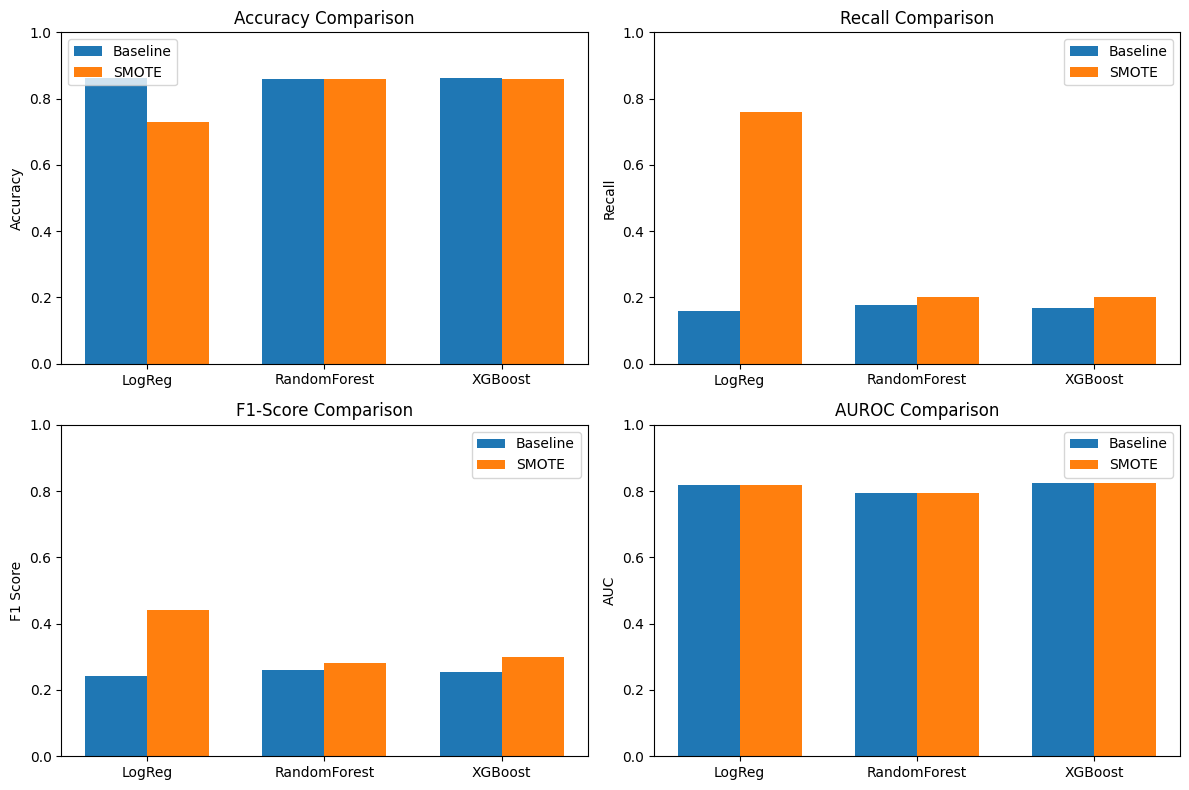

In [31]:

# Baseline vs SMOTE – Metric Comparison Chart

import matplotlib.pyplot as plt
import numpy as np

# Models
models = ["LogReg", "RandomForest", "XGBoost"]
x = np.arange(len(models))
width = 0.35  # width of the bars

# Metrics from results
# Baseline (trained on original imbalanced data)
acc_base = [0.862, 0.859, 0.863]
rec_base = [0.159, 0.178, 0.167]
f1_base  = [0.242, 0.261, 0.253]
auc_base = [0.819, 0.794, 0.824]

# After SMOTE (trained on SMOTE-resampled train, tested on imbalanced test)
acc_sm = [0.730, 0.860, 0.860]
rec_sm = [0.760, 0.200, 0.200]
f1_sm  = [0.440, 0.280, 0.300]
auc_sm = [0.818, 0.795, 0.823]


plt.figure(figsize=(12, 8))

# Accuracy
plt.subplot(2, 2, 1)
plt.bar(x - width/2, acc_base, width, label="Baseline")
plt.bar(x + width/2, acc_sm,   width, label="SMOTE")
plt.title("Accuracy Comparison")
plt.xticks(x, models)
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.legend()

# Recall
plt.subplot(2, 2, 2)
plt.bar(x - width/2, rec_base, width, label="Baseline")
plt.bar(x + width/2, rec_sm,   width, label="SMOTE")
plt.title("Recall Comparison")
plt.xticks(x, models)
plt.ylabel("Recall")
plt.ylim(0, 1)
plt.legend()

# F1-score
plt.subplot(2, 2, 3)
plt.bar(x - width/2, f1_base, width, label="Baseline")
plt.bar(x + width/2, f1_sm,   width, label="SMOTE")
plt.title("F1-Score Comparison")
plt.xticks(x, models)
plt.ylabel("F1 Score")
plt.ylim(0, 1)
plt.legend()

# AUROC
plt.subplot(2, 2, 4)
plt.bar(x - width/2, auc_base, width, label="Baseline")
plt.bar(x + width/2, auc_sm,   width, label="SMOTE")
plt.title("AUROC Comparison")
plt.xticks(x, models)
plt.ylabel("AUC")
plt.ylim(0, 1)
plt.legend()

plt.tight_layout()

# Optional: save figure to file
plt.savefig("Baseline_vs_SMOTE_Comparison.png", dpi=300)

plt.show()


Logistic Regression AUC: 0.8179034125353001
Random Forest AUC: 0.8148965140739666
XGBoost AUC: 0.8200968671246527


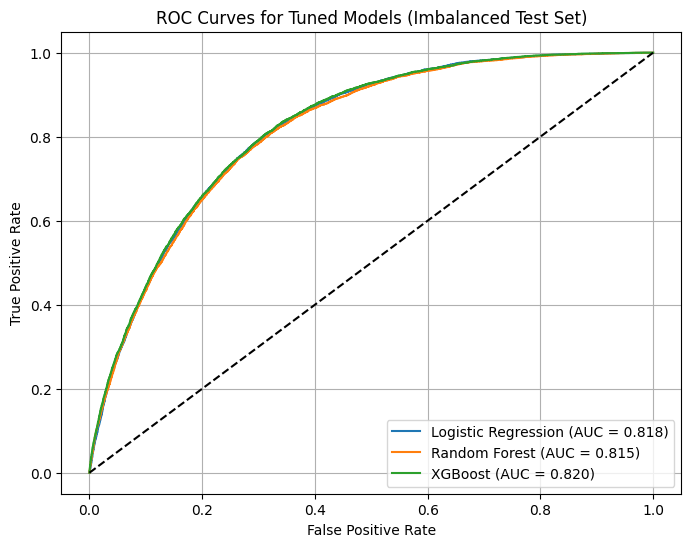

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get prediction probabilities

lr_prob = best_lr_smote_tuned.predict_proba(X_test)[:, 1]
rf_prob = best_rf_smote_tuned.predict_proba(X_test)[:, 1]
xgb_prob = best_xgb_smote_tuned.predict_proba(X_test)[:, 1]

# Compute ROC curve coordinates
fpr_lr, tpr_lr, _ = roc_curve(y_test, lr_prob)
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_prob)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_prob)


# Compute AUC scores
auc_lr = roc_auc_score(y_test, lr_prob)
auc_rf = roc_auc_score(y_test, rf_prob)
auc_xgb = roc_auc_score(y_test, xgb_prob)

print("Logistic Regression AUC:", auc_lr)
print("Random Forest AUC:", auc_rf)
print("XGBoost AUC:", auc_xgb)


# Plot the ROC Curves
plt.figure(figsize=(8, 6))

plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression (AUC = {auc_lr:.3f})")
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {auc_rf:.3f})")
plt.plot(fpr_xgb, tpr_xgb, label=f"XGBoost (AUC = {auc_xgb:.3f})")

# Random guess line
plt.plot([0,1], [0,1], 'k--')

plt.title("ROC Curves for Tuned Models (Imbalanced Test Set)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV

# Logistic Regression Tuning
print("\n Tuning Logistic Regression")
lr_param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}
lr_grid_search = GridSearchCV(
    LogisticRegression(max_iter=2000, random_state=42),
    lr_param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1, verbose=1
)
lr_grid_search.fit(X_res, y_res)

best_lr_smote_tuned = lr_grid_search.best_estimator_
print("Best parameters for Logistic Regression:", lr_grid_search.best_params_)
print("Best cross-validation ROC-AUC for Logistic Regression:", lr_grid_search.best_score_)

# Random Forest Tunining
print("\n Tuning Random Forest")
rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5]
}
rf_grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42),
    rf_param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1, verbose=1
)
rf_grid_search.fit(X_res, y_res)

best_rf_smote_tuned = rf_grid_search.best_estimator_
print("Best parameters for Random Forest:", rf_grid_search.best_params_)
print("Best cross-validation ROC-AUC for Random Forest:", rf_grid_search.best_score_)

# XGBoost Tuning
print("\n Tuning XGBoost")
xgb_param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5],
    'subsample': [0.7, 0.8],
    'colsample_bytree': [0.7, 0.8]
}
xgb_grid_search = GridSearchCV(
    XGBClassifier(objective="binary:logistic", eval_metric="auc", random_state=42),
    xgb_param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1, verbose=1
)
xgb_grid_search.fit(X_res, y_res)

best_xgb_smote_tuned = xgb_grid_search.best_estimator_
print("Best parameters for XGBoost:", xgb_grid_search.best_params_)
print("Best cross-validation ROC-AUC for XGBoost:", xgb_grid_search.best_score_)



 Tuning Logistic Regression
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters for Logistic Regression: {'C': 0.01, 'solver': 'saga'}
Best cross-validation ROC-AUC for Logistic Regression: 0.8304776748603959

 Tuning Random Forest
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters for Random Forest: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}
Best cross-validation ROC-AUC for Random Forest: 0.9708121103639625

 Tuning XGBoost
Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best parameters for XGBoost: {'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.7}
Best cross-validation ROC-AUC for XGBoost: 0.9600525212024541


In [ ]:
best_rf_smote_tuned


RandomForestClassifier(max_depth=20, n_estimators=200, random_state=42)

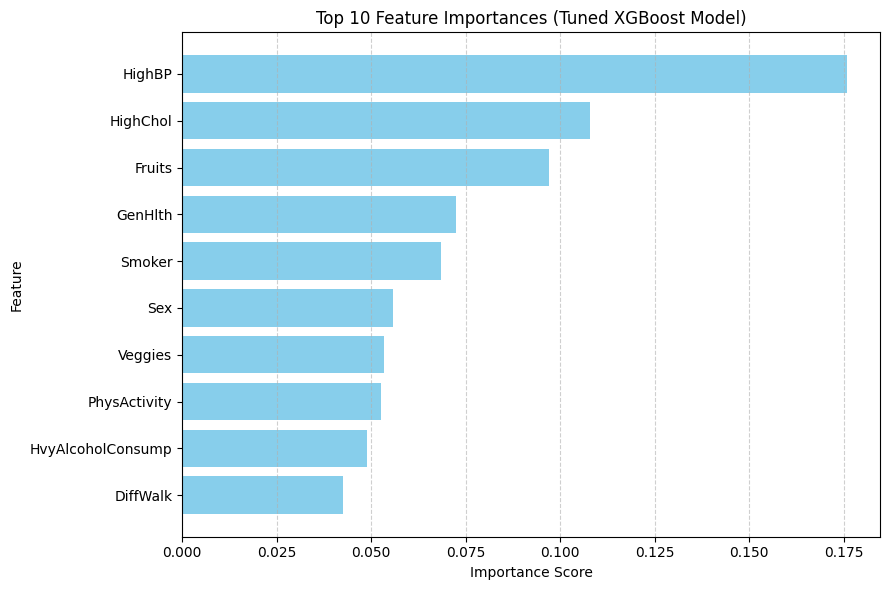

In [ ]:
import matplotlib.pyplot as plt

# Plot Top 10 Feature Importance for XGBoost
plt.figure(figsize=(9, 6))
plt.barh(top10_xgb["Feature"], top10_xgb["Importance"], color="skyblue")
plt.title("Top 10 Feature Importances (Tuned XGBoost Model)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.gca().invert_yaxis()  # Highest importance at the top
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [ ]:
shap.initjs()

Generating SHAP bar plot for top 10 important features...


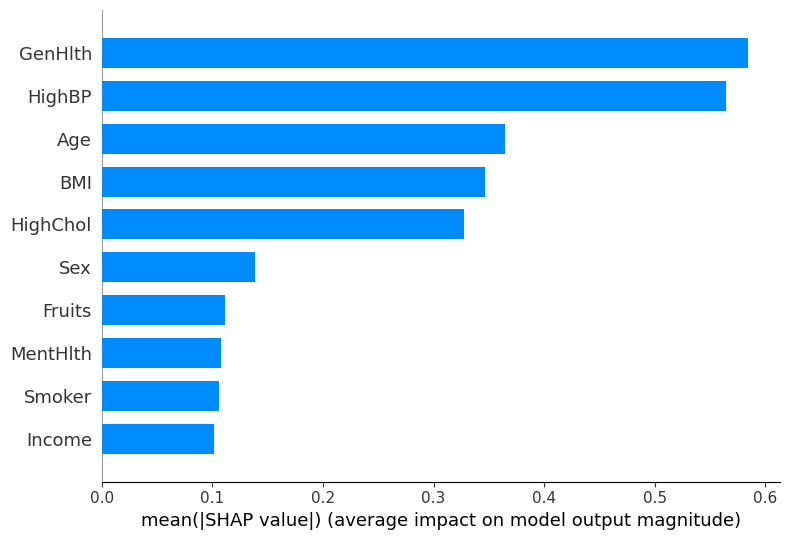

Generating SHAP beeswarm plot...


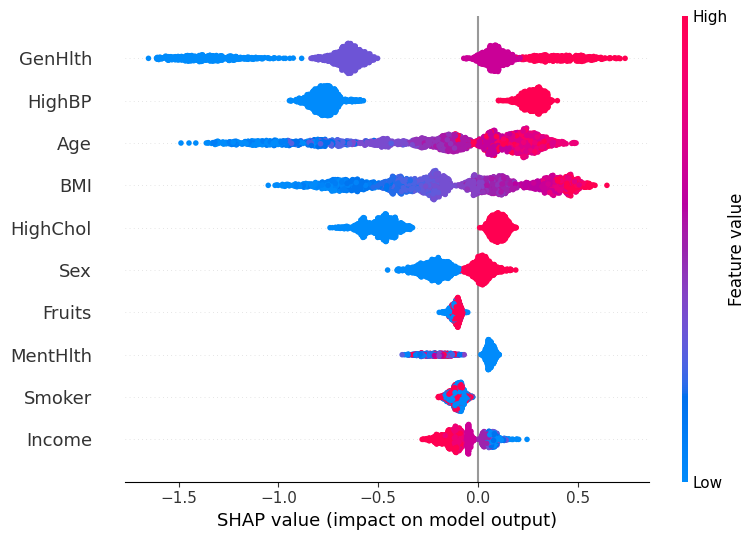

In [ ]:
# Create SHAP Explainer

# Use a subset of the test set for speed (X_test_sample)
try:
    X_test_sample = X_test.sample(2000, random_state=42)
except:
    X_test_sample = X_test

explainer = shap.TreeExplainer(best_xgb_smote_tuned) # Corrected variable name
shap_values = explainer.shap_values(X_test_sample)

#Global Feature Importance (Top 10 Bar Chart)
print("Generating SHAP bar plot for top 10 important features...")
shap.summary_plot(shap_values, X_test_sample, plot_type="bar", max_display=10)


#Global Beeswarm Plot (Feature Impact + Direction)

print("Generating SHAP beeswarm plot...")
shap.summary_plot(shap_values, X_test_sample, max_display=10)
